<IPython.core.display.Javascript object>


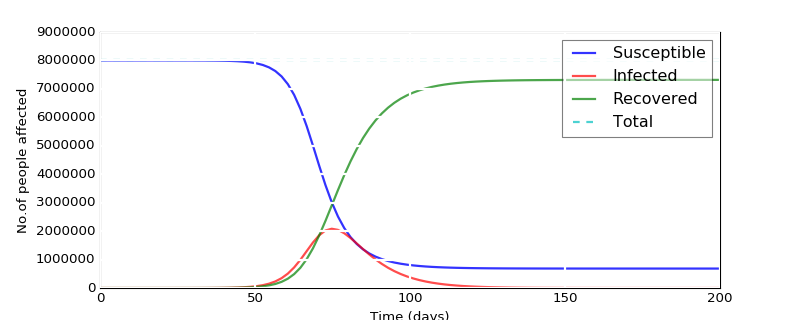

In [1]:
# SIR MODEL-CHENNAI.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from scipy.integrate import odeint
import plotly.express as ps
%matplotlib notebook


def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * I * S/N -  gamma * I
    dRdt =  gamma * I
    
    return dSdt, dIdt, dRdt

N = 8000000 # approximate population of Chennai
D = 14.0 # It takes an average of two weeks to recover
gamma = 0.13


def R_0(t):
    return 2.69 
def beta(t):
    return R_0(t) * gamma

S0, I0, R0 = N-1, 1, 0 # initial conditions: one exposed

t= np.linspace(0,200,100)
y0 = S0,I0, R0 
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

def plot_model(t,S,I,R):
    f,ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b',linestyle = 'solid', alpha=0.8, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'r',linestyle = 'solid', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g',linestyle = 'solid', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, S+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('No.of people affected')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=False, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
       ax.spines[spine].set_visible(True)
    plt.show()
   
    
plot_model(t,S,I,R)


In [ ]:
#SIRD MODEL-COVID'19,CHENNAI
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from scipy.integrate import odeint
import plotly.express as ps

def deriv(y, t, N, beta, gamma,mu):
    S, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * I * S/N -  gamma * I - mu * I
    dRdt =  gamma * I
    dDdt = mu * I
    
    return dSdt, dIdt, dRdt, dDdt

N = 8000000# approximate population of Chennai
gamma = 0.13
mu = 0.034

def R_0(t):
      return 2.69

def beta(t):
    return R_0(t) * gamma

S0, I0, R0 , D0 = N-1, 1, 0, 0 # initial conditions: one exposed

t= np.linspace(0,200,100)
y0 = S0,I0, R0, D0
ret = odeint(deriv, y0, t, args=(N, beta, gamma,mu))
S, I, R, D = ret.T

def plot_model(t,S,I,R,D):
    f,ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b',linestyle = 'solid', alpha=0.8, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'r',linestyle = 'solid', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g',linestyle = 'solid', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'black',linestyle = 'solid', alpha=0.7, linewidth=2, label='Deceased')
    ax.plot(t, S+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('No.of people affected')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
       ax.spines[spine].set_visible(True)
    plt.show()
   
    
plot_model(t,S,I,R,D)